## Visualizations

In [190]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [191]:
# get data
df = pd.read_csv('data/MOC_features.csv')

In [192]:
# set colors
last_5 = palette = "Set2"
party = {'Republican': '#be4d25', 'Democrat': '#2596be'}
gender = {'M': sns.color_palette()[2], 'F': sns.color_palette()[4]}
chamber = {'sen': sns.color_palette()[5], 'rep': sns.color_palette()[6]}

Text(0.5, 1.0, 'Bill Cosponsorships per Member\nOver Time')

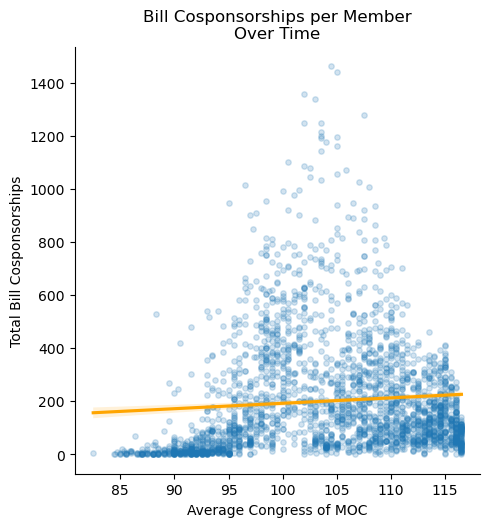

In [193]:
# chart cosponsorships per member over time
df['proposed_per_member'] = df.total_edge_weight / 535

sns.lmplot(data = df, x = 'avg_congress', y = 'proposed_per_member', 
           scatter_kws = {'alpha': 0.2, 's': 15},
           line_kws = {'color': 'orange'})
plt.xlabel("Average Congress of MOC")
plt.ylabel("Total Bill Cosponsorships")
plt.title("Bill Cosponsorships per Member\nOver Time")

(0.0, 600000.0)

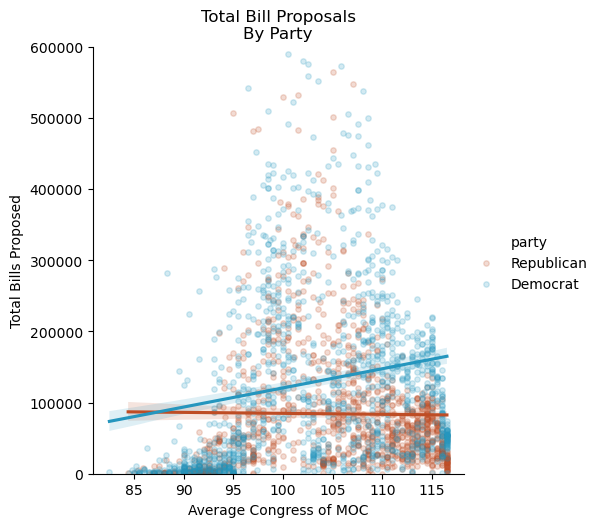

In [194]:
# chart avg cosponsorships per member over time
sns.lmplot(data = df, x = 'avg_congress', y = 'total_edge_weight', 
           hue = 'party',scatter_kws = {'alpha': 0.2, 's': 15},
           palette = party)
plt.xlabel("Average Congress of MOC")
plt.ylabel("Total Bills Proposed")
plt.title("Total Bill Proposals\nBy Party")
plt.ylim(0,600000)

Text(0.5, 1.0, 'Bipartisan Cosponsorship by MOC State')

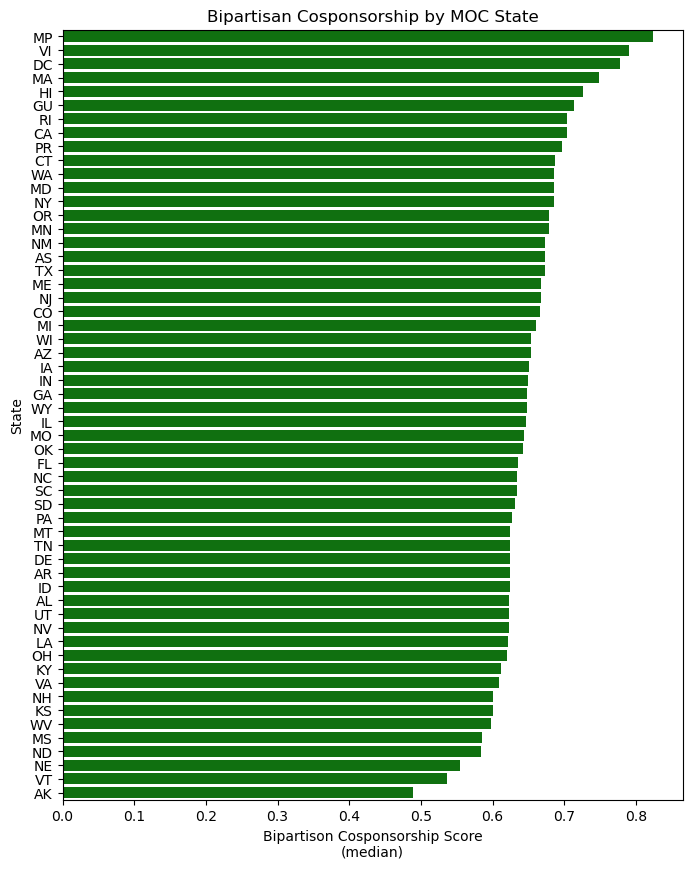

In [195]:
# chart bipart score by state
order = df.groupby(["state"])['bipartisan_cosponsorship_score'].aggregate(np.median).reset_index(
    ).sort_values('bipartisan_cosponsorship_score', ascending = False)
plt.figure(figsize=(8, 10)) # otherwise state names overlap
sns.barplot(data = df, x = 'bipartisan_cosponsorship_score', y = 'state', 
            estimator = 'median', errorbar = None, color = 'g', order = order['state'])
plt.xlabel("Bipartison Cosponsorship Score\n(median)")
plt.ylabel("State")
plt.title("Bipartisan Cosponsorship by MOC State")

Text(0.5, 1.0, 'Bipartisan Cosponsorship Over Time\nBy Chamber')

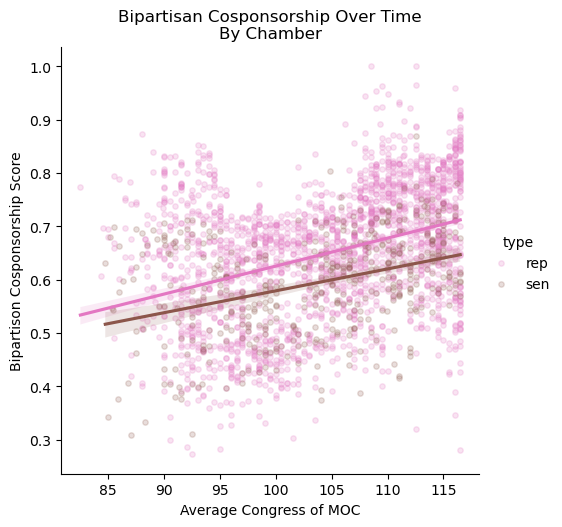

In [196]:
# chart bipart score vs. avg. congress by chamber
sns.lmplot(data = df, x = 'avg_congress', y = 'bipartisan_cosponsorship_score', 
           hue = 'type', scatter_kws = {'alpha': 0.2, 's': 15},
           palette = chamber)
plt.xlabel("Average Congress of MOC")
plt.ylabel("Bipartison Cosponsorship Score")
plt.title("Bipartisan Cosponsorship Over Time\nBy Chamber")

Text(0.5, 1.0, 'Bipartisan Cosponsorship Over Time\n (Measured by Average Congress per MOC)')

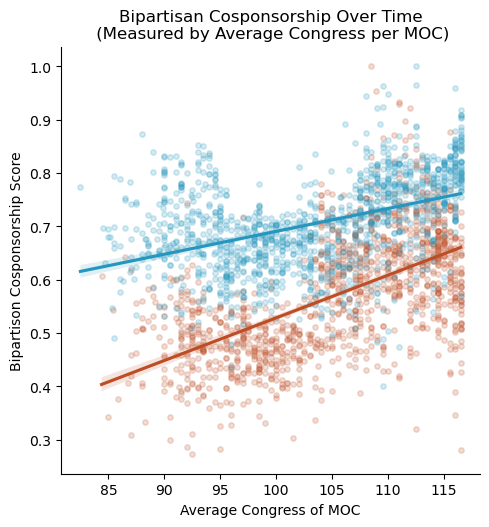

In [197]:
# chart bipart score vs. avg. congress by party
sns.lmplot(data = df, x = 'avg_congress', y = 'bipartisan_cosponsorship_score', 
           hue = 'party', legend = False, scatter_kws = {'alpha': 0.2, 's': 15},
           palette = party)
plt.xlabel("Average Congress of MOC")
plt.ylabel("Bipartison Cosponsorship Score")
plt.title("Bipartisan Cosponsorship Over Time\n (Measured by Average Congress per MOC)")

In [198]:
df.columns

Index(['Unnamed: 0', 'first_name', 'last_name', 'nickname', 'birthday',
       'gender', 'type', 'state', 'district', 'senate_class', 'party',
       'bioguide_id', 'thomas_id', 'same_party_edges', 'total_edge_weight',
       'bipartisan_cosponsorship_score', 'pagerank', 'clustering',
       'centrality', 'closeness', 'betweenness', 'congresses', 'avg_congress',
       'birthyear', 'since_111', 'proposed_per_member'],
      dtype='object')

Text(0.5, 1.0, "Bipartisan Cosponsorship Over Time\n(Measured by MOC's Birthyear)")

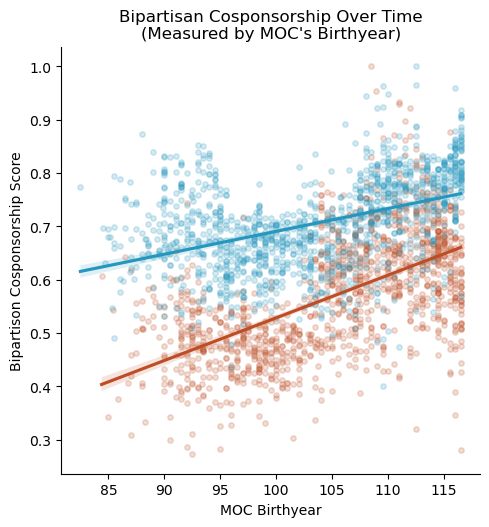

In [200]:
# chart bipart score by birthday
sns.lmplot(data = df, x = 'avg_congress', y = 'bipartisan_cosponsorship_score', 
           hue = 'party', legend = False, scatter_kws = {'alpha': 0.2, 's': 15},
           palette = party)
plt.xlabel("MOC Birthyear")
plt.ylabel("Bipartison Cosponsorship Score")
plt.title("Bipartisan Cosponsorship Over Time\n(Measured by MOC's Birthyear)")

Text(0.5, 1.0, 'Bipartisan Cosponsorship Density\n by Party')

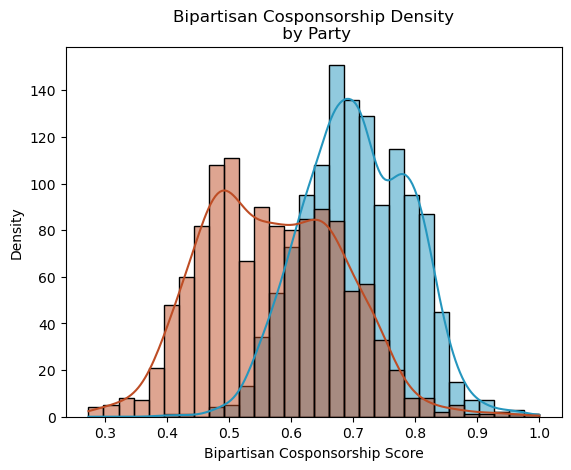

In [201]:
# chart bipart score density by party
sns.histplot(df, x = 'bipartisan_cosponsorship_score', kde = True, hue = 'party',
           legend = False, palette = party)
plt.xlabel("Bipartisan Cosponsorship Score")
plt.ylabel("Density")
plt.title("Bipartisan Cosponsorship Density\n by Party")

Text(0.5, 1.0, 'Bipartisan Cosponsorship Density\n by Recentness of Service')

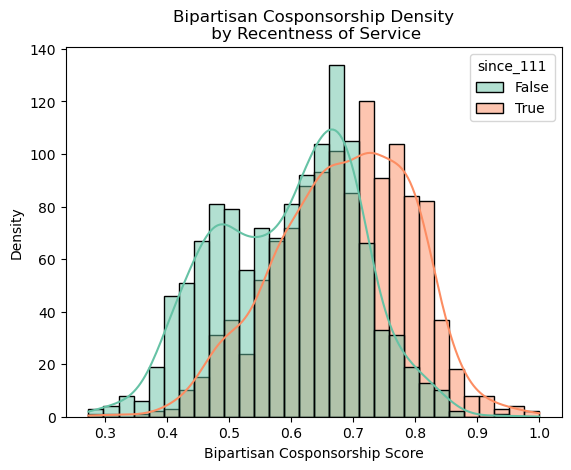

In [202]:
# chart bipart score density by recent service
sns.histplot(df, x = 'bipartisan_cosponsorship_score', kde = True, hue = 'since_111',
            palette = last_5)
plt.xlabel("Bipartisan Cosponsorship Score")
plt.ylabel("Density")
plt.title("Bipartisan Cosponsorship Density\n by Recentness of Service")

Text(0.5, 1.0, 'Bipartisan Cosponsorship Density\n by Gender')

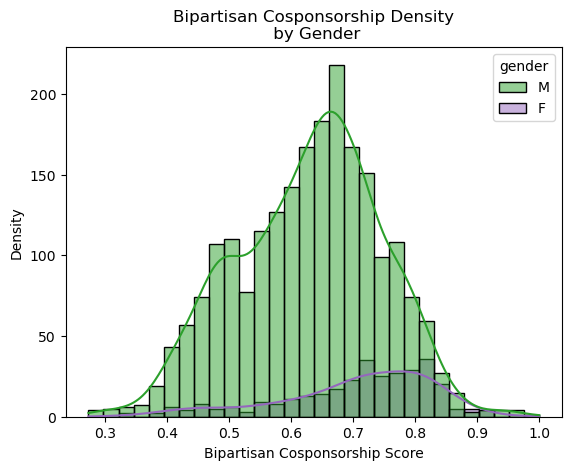

In [203]:
# chart bipart score density by gender
sns.histplot(df, x = 'bipartisan_cosponsorship_score', kde = True, hue = 'gender',
            palette = gender)
plt.xlabel("Bipartisan Cosponsorship Score")
plt.ylabel("Density")
plt.title("Bipartisan Cosponsorship Density\n by Gender")

Text(0.5, 1.0, 'Pagerank Density by Gender')

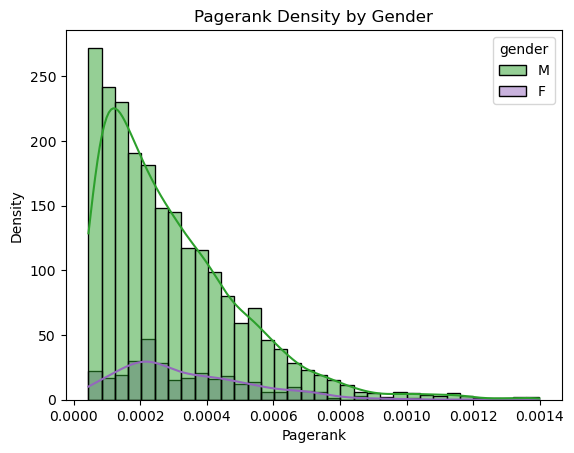

In [204]:
# chart pagerank score density by gender
sns.histplot(df, x = 'pagerank', kde = True, hue = 'gender', palette = gender)
plt.xlabel("Pagerank")
plt.ylabel("Density")
plt.title("Pagerank Density by Gender")

Text(0.5, 1.0, 'Bipartisanship Vs. Pagerank Importance\nby Party')

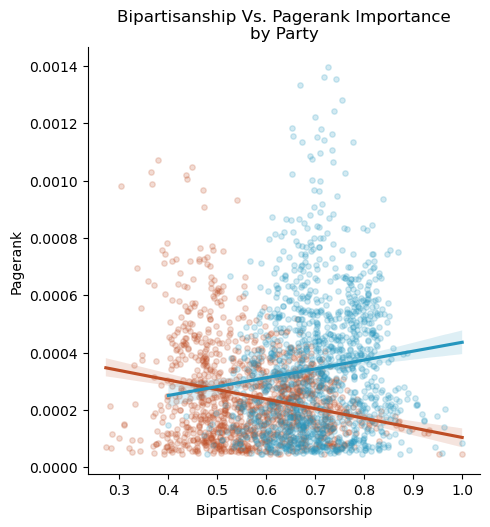

In [205]:
# chart bipart score vs. pagerank by party
sns.lmplot(data = df, x = 'bipartisan_cosponsorship_score', y = 'pagerank', 
           hue = 'party', legend = False, scatter_kws = {'alpha': 0.2, 's': 15},
           palette = party)
plt.xlabel("Bipartisan Cosponsorship")
plt.ylabel("Pagerank")
plt.title("Bipartisanship Vs. Pagerank Importance\nby Party")

Text(0.5, 1.0, 'Bipartisanship Vs. Pagerank by Party (more recent)\nMembers who Served in Congresses 111 - 116')

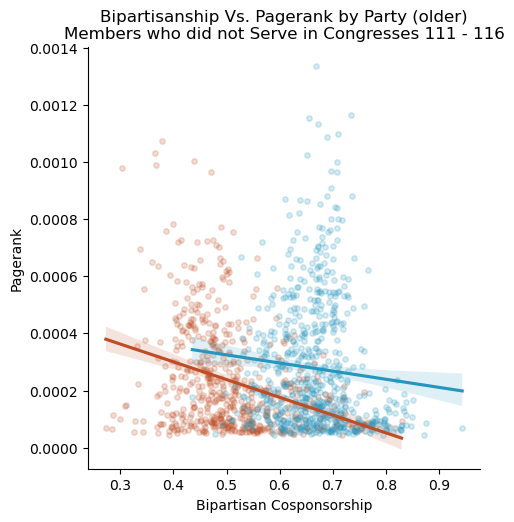

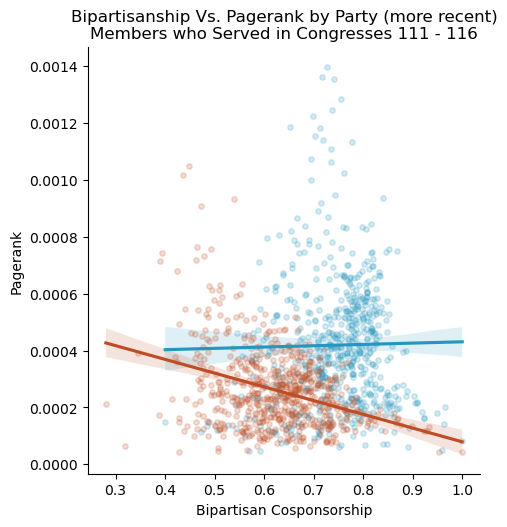

In [206]:
# chart bip score vs. pagerank by party

sns.lmplot(df[df.since_111 == False], x = 'bipartisan_cosponsorship_score', y = 'pagerank', 
           hue = 'party', legend = False, scatter_kws = {'alpha': 0.2, 's': 15},
           palette = party)
plt.xlabel("Bipartisan Cosponsorship")
plt.ylabel("Pagerank")
plt.title("Bipartisanship Vs. Pagerank by Party (older)\nMembers who did not Serve in Congresses 111 - 116")

sns.lmplot(df[df.since_111 == True], x = 'bipartisan_cosponsorship_score', y = 'pagerank', 
           hue = 'party', legend = False, scatter_kws = {'alpha': 0.2, 's': 15},
           palette = party)
plt.xlabel("Bipartisan Cosponsorship")
plt.ylabel("Pagerank")
plt.title("Bipartisanship Vs. Pagerank by Party (more recent)\nMembers who Served in Congresses 111 - 116")

Text(0.5, 1.0, 'Bipartisanship Vs. Pagerank Importance\n by Recentness of Service')

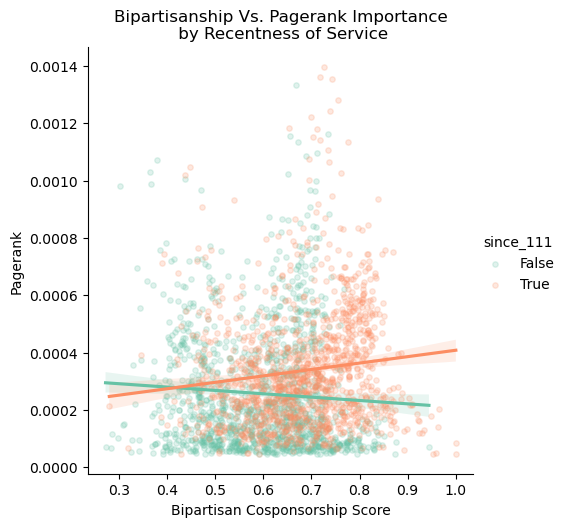

In [207]:
# chart bipart score vs. pagerank by recent service
sns.lmplot(data = df, x = 'bipartisan_cosponsorship_score', y = 'pagerank', 
           hue = 'since_111', scatter_kws = {'alpha': 0.2, 's': 15}, palette = last_5)
plt.xlabel("Bipartisan Cosponsorship Score")
plt.ylabel("Pagerank")
plt.title("Bipartisanship Vs. Pagerank Importance\n by Recentness of Service")

Text(0.5, 1.01, 'Pairplot of Network Features By Chamber')

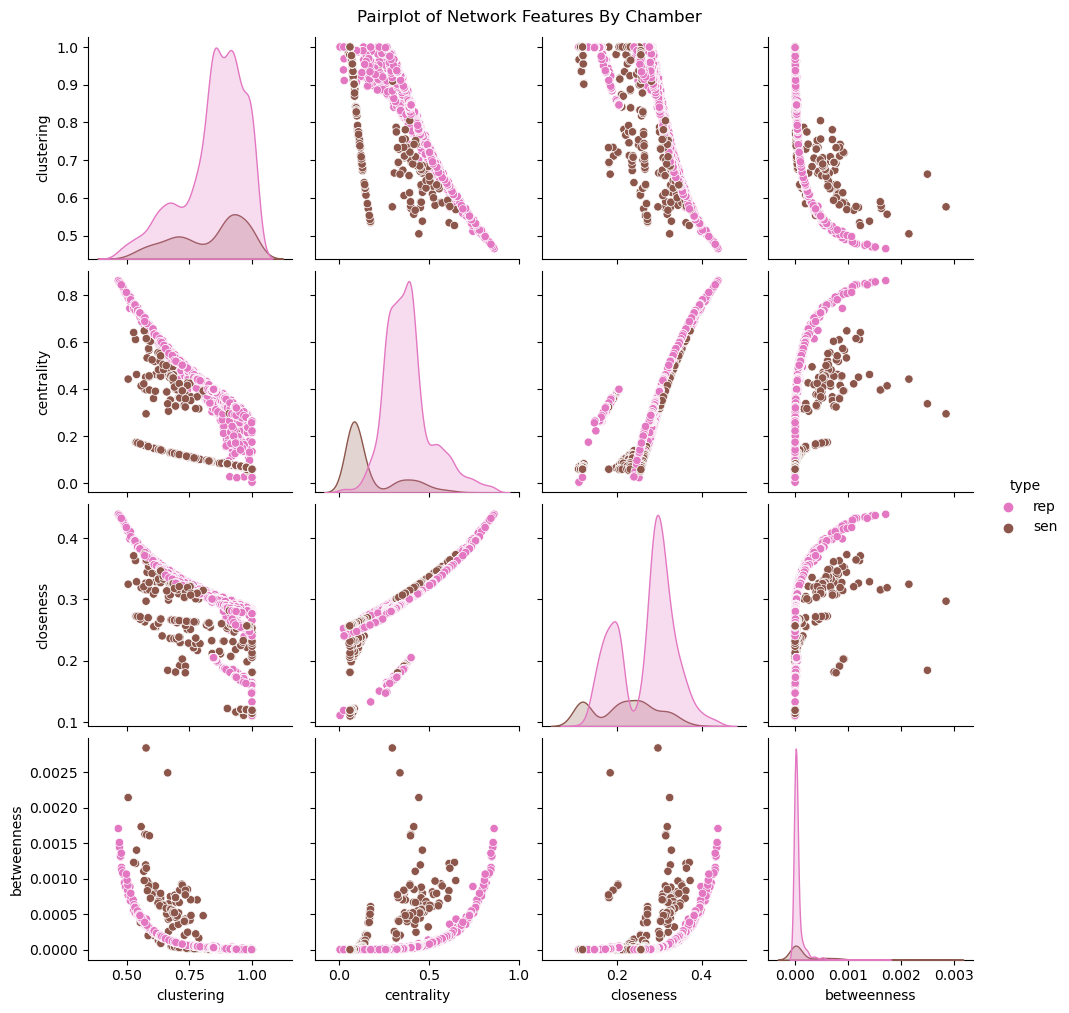

In [136]:
# pairplot network features by chamber
sns.pairplot(data = df, hue = 'type', palette = chamber,
             vars = ['clustering', 'centrality', 'closeness', 'betweenness'])
plt.suptitle("Pairplot of Network Features By Chamber", y = 1.01)